In [95]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [ ]:
uploaded=files.upload()

In [96]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_images = []
        temp_labels = []
        for row in csv_reader:
            if first_line:
                # print("Ignoring first line")
                first_line = False
            else:
                temp_labels.append(row[0])
                image_data = row[1:785]
                image_data_as_array = np.array_split(image_data, 28)
                temp_images.append(image_data_as_array)
        images = np.array(temp_images).astype('float')
        labels = np.array(temp_labels).astype('float')
    return images, labels

training_images, training_labels = get_data('sign_mnist_train.csv')
testing_images, testing_labels = get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [97]:
training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# validation_datagen = ImageDataGenerator(
#     rescale=1. / 255)

print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [98]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size= (2, 2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, kernel_size= (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, kernel_size= (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(26, activation=tf.nn.softmax)])

model.summary()
# model.evaluate(testing_images, testing_labels)

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 27, 27, 16)        80        
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 12, 12, 32)        2080      
_________________________________________________________________
max_pooling2d_130 (MaxPoolin (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_131 (Conv2D)          (None, 5, 5, 64)          8256      
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_44 (Flatten)         (None, 256)             

In [99]:
# Compile Model. 
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

# # Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=40,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)

Epoch 1/40
858/857 [==============================] - 26s 30ms/step - loss: 2.9164 - accuracy: 0.1162 - val_loss: 2.5883 - val_accuracy: 0.1938
Epoch 2/40
858/857 [==============================] - 26s 30ms/step - loss: 2.2924 - accuracy: 0.2791 - val_loss: 2.0841 - val_accuracy: 0.3257
Epoch 3/40
858/857 [==============================] - 26s 30ms/step - loss: 1.8968 - accuracy: 0.3868 - val_loss: 1.7373 - val_accuracy: 0.4377
Epoch 4/40
858/857 [==============================] - 26s 30ms/step - loss: 1.6464 - accuracy: 0.4641 - val_loss: 1.6486 - val_accuracy: 0.4579
Epoch 5/40
858/857 [==============================] - 26s 30ms/step - loss: 1.4549 - accuracy: 0.5227 - val_loss: 1.3872 - val_accuracy: 0.5353
Epoch 6/40
858/857 [==============================] - 26s 30ms/step - loss: 1.3298 - accuracy: 0.5560 - val_loss: 1.2979 - val_accuracy: 0.5739
Epoch 7/40
858/857 [==============================] - 26s 30ms/step - loss: 1.2089 - accuracy: 0.5995 - val_loss: 1.2101 - val_accuracy:

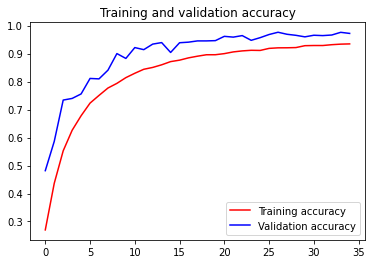

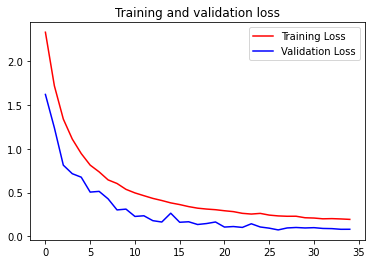

In [ ]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
(ls,acc)=model.evaluate(x=testing_images,y=testing_labels)

225/225 [==============================] - 2s 7ms/step - loss: 227.3712 - accuracy: 0.7089


In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 70.88678479194641%
